<a href="https://colab.research.google.com/github/kirubel-Biruk-Shiferaw/mlci_shortcourse/blob/main/FinalMHKBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [25]:
#Read the data
data = pd.read_excel("/content/Data_raw.xlsx")

In [26]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
data.info() # General information

In [ ]:
data.isnull().sum()

In [28]:
print(data.isnull().sum()* 100 / len(data))

v025                     0.000000
v106                     0.000000
v119                     0.000000
v190                     0.000000
v404                     0.000000
b4                       0.000000
b9                       0.000000
outcomevar               0.000000
ageofchild               0.000000
fuel                     0.000000
toilet                   0.000000
ocupation                0.000000
wasting                  8.799074
stunting                 0.000000
diarrhea                 0.000000
drug                     0.000000
livingchildren           0.000000
water                    3.546995
durationbreastfeeding    0.000000
vitamin                  5.957268
V005                     0.000000
wt                       0.000000
dtype: float64


<Axes: >

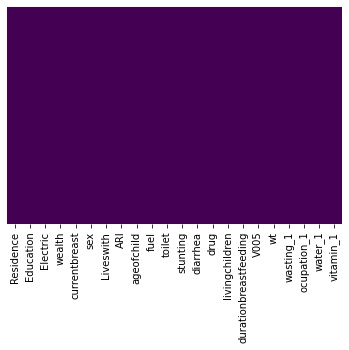

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data= data.drop('wt', axis=1)

In [9]:
data= data.drop('V005', axis=1)

In [10]:
data= data.drop('v190', axis=1)

KeyError: ignored

In [11]:
data= data.drop('stunting', axis=1)

In [12]:
data= data.drop('livingchildren', axis=1)

In [13]:
data= data.drop('b4', axis=1)

KeyError: ignored

In [ ]:
# Recode missing values as -1
#data = data.fillna(-1)
#data = data.replace({pd.np.nan: -1, None: -1})

In [14]:
data.corr() # we want to see the correlation because we dont want features with no correlation with the outcome variable and still imbalanced feature.

,Residence,Education,Electric,wealth,currentbreast,sex,Liveswith,ARI,ageofchild,fuel,toilet,diarrhea,drug,durationbreastfeeding,wasting_1,ocupation_1,water_1,vitamin_1
Residence,1.000000,-0.474882,-0.373047,-0.625395,0.081798,0.002475,-0.019720,0.032392,0.028349,0.566396,0.225614,0.020360,-0.035420,-0.022137,0.037123,-0.063417,0.166667,-0.016162
Education,-0.474882,1.000000,0.281202,0.474578,-0.029723,0.000550,0.019257,-0.023425,-0.085302,-0.405219,-0.112128,0.011293,0.084561,0.001756,-0.068032,0.140057,-0.030214,0.019933
Electric,-0.373047,0.281202,1.000000,0.375063,-0.036943,0.007642,0.006836,0.003396,-0.039627,-0.078914,0.055388,0.006531,0.011818,-0.004364,-0.054774,0.036309,-0.136921,0.016160
wealth,-0.625395,0.474578,0.375063,1.000000,-0.050972,0.005320,-0.009230,0.000776,-0.025343,-0.412610,-0.425330,0.011143,0.085187,-0.000647,-0.098333,0.139354,-0.009096,0.015037
currentbreast,0.081798,-0.029723,-0.036943,-0.050972,1.000000,0.025058,-0.081318,0.026751,-0.364697,0.070389,0.003234,0.030995,-0.067377,-0.126669,0.019672,-0.019776,0.029054,-0.009911
sex,0.002475,0.000550,0.007642,0.005320,0.025058,1.000000,0.003672,-0.006241,-0.021818,0.005278,-0.020528,-0.022366,-0.017819,0.007015,-0.031403,0.003197,-0.008399,-0.012617
Liveswith,-0.019720,0.019257,0.006836,-0.009230,-0.081318,0.003672,1.000000,-0.012497,0.067240,0.002866,0.016130,-0.024302,-0.006720,0.022611,-0.044117,-0.019770,-0.021133,-0.009973
ARI,0.032392,-0.023425,0.003396,0.000776,0.026751,-0.006241,-0.012497,1.000000,-0.046030,0.024464,0.010070,0.194696,0.016342,-0.020770,0.016510,0.022862,0.003114,0.017163
ageofchild,0.028349,-0.085302,-0.039627,-0.025343,-0.364697,-0.021818,0.067240,-0.046030,1.000000,0.020890,0.003705,-0.096323,0.131605,0.078265,-0.027130,0.056722,0.014028,-0.001673
fuel,0.566396,-0.405219,-0.078914,-0.412610,0.070389,0.005278,0.002866,0.024464,0.020890,1.000000,0.147003,0.016252,-0.033175,-0.007885,0.040925,-0.048091,0.140417,-0.008406


<Axes: >

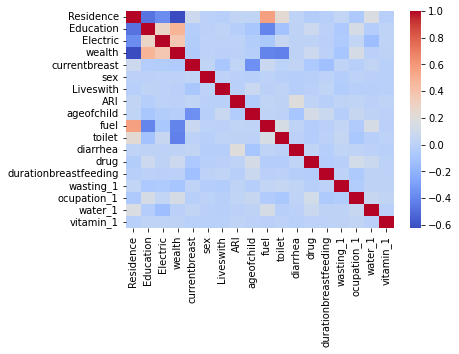

In [15]:
sns.heatmap(data.corr(), cmap='coolwarm') #Very good correlation 

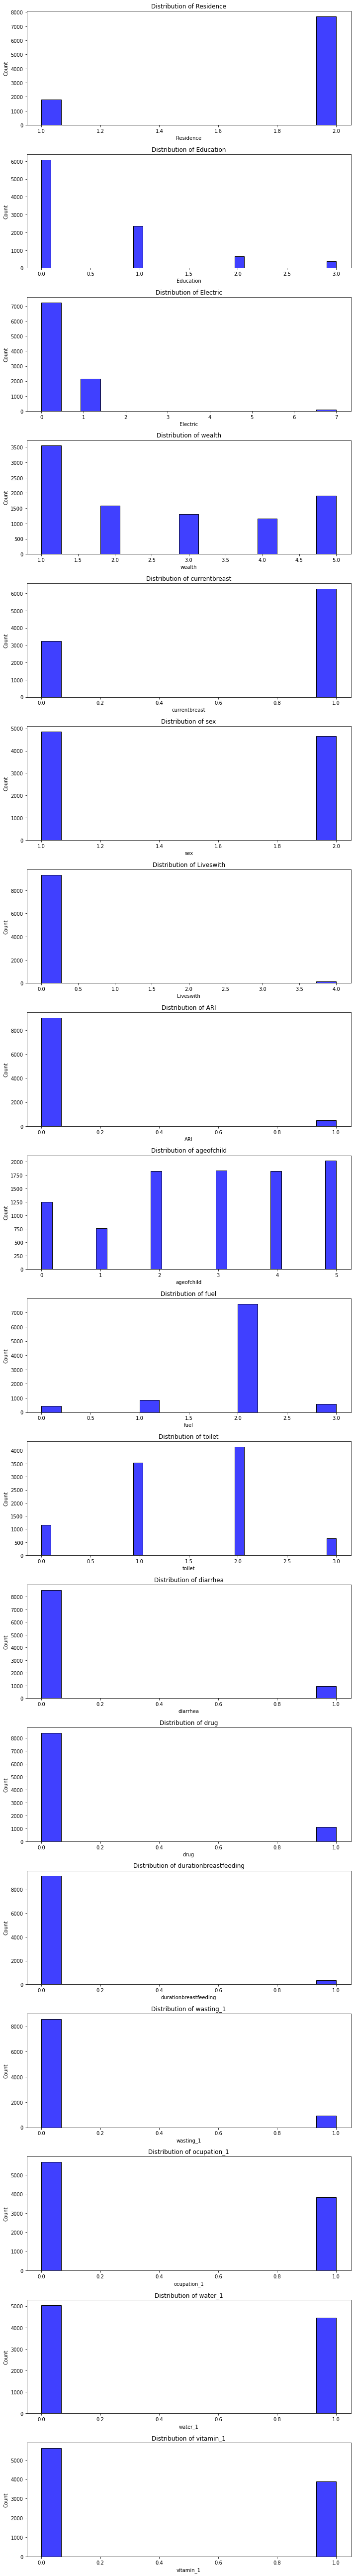

In [16]:
# Plot all the variables using histogram subplots
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10,len(data.columns)*4))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=False, color='b')
    axes[i].set_title(f"Distribution of {col}")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data= data.drop('v119', axis=1) #we figured that v119 is both imbalanced an very low corr with the outcomevar

In [18]:
#Imputation is requiered to handle the missing values
# Based on the nature and number of smaller number of missing values, Mode imputation is appropriate.
cateogry_columns=data.select_dtypes(include=['object']).columns.tolist()
integer_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()

for column in data:
    if data[column].isnull().any():
        if(column in cateogry_columns):
            data[column]=data[column].fillna(data[column].mode()[0])
        else:
            data[column]=data[column].fillna(data[column].mean)

<AxesSubplot:>

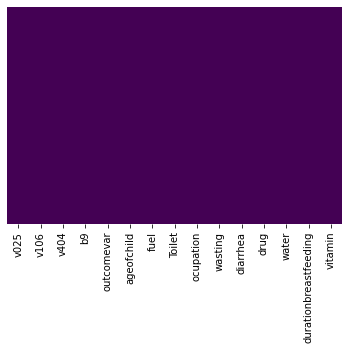

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# convert all columns to integer data type
data = data.astype(int)

# save the new DataFrame to a new CSV file
data.to_csv('new_data.csv', index=False)

In [20]:
X= data.drop(["ARI"], axis = 1)
Y= data["ARI"]

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits = 5, shuffle= True)

In [ ]:
#print("Train set        Test set  ")
#for train_set, test_set in kf.split(data):
  #print (train_set, test_set)

In [ ]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#print('The number of records in the training dataset is', X_train.shape[0])
#print('The number of records in the test dataset is', X_test.shape[0])

Baseline RF model

In [22]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# Model training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)

In [23]:
from sklearn.metrics import classification_report
baseline_prediction = clf.predict(x_test)

# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1817
           1       0.00      0.00      0.00        84

    accuracy                           0.96      1901
   macro avg       0.48      0.50      0.49      1901
weighted avg       0.91      0.96      0.93      1901



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Basline model and Hyperparameter tuning

In [ ]:
# Define the Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4,6,8, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'random_state' : [42]
}


In [ ]:
# Define the K-Fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Grid Search with K-Fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=kf)

# Fit the Grid Search to the diabetes data
grid_search.fit(X, Y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Best score:  0.9502151776073534


In [ ]:
rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 50, random_state = 42).fit(x_train, y_train)

In [ ]:
tuned_baseline_prediction = rf_tuned.predict(x_test)

# Check the model performance
print(classification_report(y_test, tuned_baseline_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1817
           1       0.00      0.00      0.00        84

    accuracy                           0.96      1901
   macro avg       0.48      0.50      0.49      1901
weighted avg       0.91      0.96      0.93      1901



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Check the basline model performance (No resampling, with Grid search and cross validation of 5)
#print(classification_report(y_test, baseline_prediction))

In [ ]:
#Train the model with grid search or tuned hyperparametrs 
#Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [2,4]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [ ]:
#param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
#print(param_grid)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf_Model = RandomForestClassifier()

In [ ]:
#from sklearn.model_selection import GridSearchCV
#rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [ ]:
#rf_Grid.fit(X_train, y_train)

In [ ]:
#rf_Grid.best_params_

In [ ]:
#print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
#print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [ ]:
#from sklearn.metrics import classification_report
#baseline_model = rf_Grid.fit(X_train, y_train)
#baseline_prediction = baseline_model.predict(X_test)

# Check the basline model performance (No resampling, with Grid search and cross validation of 5)
#print(classification_report(y_test, baseline_prediction))

In [ ]:
# Visualize the data
#plt.figure(figsize=(12, 8))
#sns.scatterplot(x = 'diarrhea', y = 'ageofchild', hue = 'outcomevar', data = data)

In [ ]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#print('The number of records in the training dataset is', X_train.shape[0])
#print('The number of records in the test dataset is', X_test.shape[0])

In [ ]:
# Check the number of majority and minority classes for the training dataset
#from collections import Counter
#print(sorted(Counter(y_train).items()))

In [ ]:
#then let's see the imbalance and handle it
# plot the no of 1's and 0's
#g = sns.countplot(data['outcomevar'])
#g.set_xticklabels(['No', 'Yes'])
#plt.show() #The imbalance is not fair

In [ ]:
#The most critical performance metric for the rare events modeling is usually the minority class recall or precision values. 
#For example, in the context of ARI, we would like to maximize the true positive rate and capture as many YES cases as possible, 
#so recall for the minority class is the metric we would like to optimize.

Baseline Model- RF

In [ ]:
#Data_input = data.drop(["outcomevar"], axis = 1)
#Data_output = data.outcomevar

In [ ]:
#print(Data_output)

In [ ]:
##We'll be using Kfold spliting technique as it provides robust results in model learning curves and improved model performance
#from sklearn.model_selection import KFold
#kf = KFold(n_splits = 5, shuffle= True)

In [ ]:
##print("Train set        Test set  ")
#for train_set, test_set in kf.split(Data_input):
  #print (train_set, test_set)


In [ ]:
#Lets run the base model

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=10)

In [ ]:
#from sklearn.model_selection import cross_val_score
#print(cross_val_score(rf, Data_input, Data_output, scoring= 'accuracy', cv=10))

In [ ]:
#accuracy = cross_val_score(rf,Data_input, Data_output, scoring= 'accuracy', cv=10 ).mean()* 100
#print ('The accuracy of baseline RF classifier is :', accuracy)

In [ ]:
# Train the random forest model
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report
#rf = RandomForestClassifier(n_estimators=10)
#baseline_model = rf.fit(X_train, y_train)
#baseline_prediction = baseline_model.predict(X_test)

# Check the model performance
#print(classification_report(y_test, baseline_prediction))

In [ ]:
#Now we see that the Recall/True positive ranges from 0.02 to 1 which indicate a very low recall rate for the minority class (YES)

Ros- Random Oversampler

In [ ]:
# we will try 3 methods and choose the best one
#option one- Random oversampler/ Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)

# Check the number of records after over sampling
from collections import Counter
print(sorted(Counter(y_train_ros).items()))

# Convert the resampled data to a pandas DataFrame
resampled_df = pd.DataFrame(X_train_ros, columns=X.columns)
resampled_df['outcomevar'] = y_train_ros

[(0, 7211), (1, 7211)]


In [ ]:
sns.countplot(x ='outcomevar', data=resampled_df) #The imbalance is corrected

In [ ]:
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'diarrhea', y = 'ageofchild', hue = 'outcomevar', data = resampled_df)
plt.title('Random Over Sampling')

In [ ]:
X_train_ros = X_train_ros.drop(['outcomevar'], axis=1)

In [ ]:
ros_model = rf_tuned.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(x_test)

# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1817
           1       0.14      0.39      0.20        84

    accuracy                           0.86      1901
   macro avg       0.55      0.64      0.57      1901
weighted avg       0.93      0.86      0.89      1901



In [ ]:
#Now let's check if the ros made any improvment in the recall/ True positive/ precision value 
#Train the random forest model
#rf = RandomForestClassifier()
#ros_model = rf.fit(X_train_ros, y_train_ros)
#ros_prediction = ros_model.predict(X_test)

# Check the model performance
#print(classification_report(y_test, ros_prediction))

In [ ]:
#now it improved to 0,05 but it is still very low so let's try other methods.

SMOTE

In [ ]:
# Randomly over sample the minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 7211), (1, 7211)]


In [ ]:
# Train the random forest model
# rf = RandomForestClassifier()
smote_model = rf_tuned.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(x_test)

# Check the model performance
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73      1817
           1       0.07      0.67      0.13        84

    accuracy                           0.59      1901
   macro avg       0.52      0.63      0.43      1901
weighted avg       0.93      0.59      0.70      1901



In [ ]:
#Now it goes up to 0.17 but it is still low. 

Near Miss Undersampling

In [ ]:
#now try nearmiss
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(x_train, y_train)

In [ ]:
# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))

[(0, 389), (1, 389)]


In [ ]:
# Train the random forest model
#rf = RandomForestClassifier()
nearmiss_model = rf_tuned.fit(X_train_nearmiss, y_train_nearmiss)
nearmiss_prediction = nearmiss_model.predict(x_test)

# Check the model performance
print(classification_report(y_test, nearmiss_prediction))

              precision    recall  f1-score   support

           0       0.96      0.36      0.52      1817
           1       0.05      0.71      0.09        84

    accuracy                           0.37      1901
   macro avg       0.51      0.54      0.31      1901
weighted avg       0.92      0.37      0.50      1901



In [ ]:
# this one does a better job by increasing the recall to 0.67 but let's see if we still can improve

Random undersampling

In [ ]:
# Randomly under sample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(x_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 389), (1, 389)]


In [ ]:
# Train the random forest model
# rf = RandomForestClassifier()
rus_model = rf_tuned.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(x_test)

# Check the model performance
print(classification_report(y_test, rus_prediction))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1817
           1       0.10      0.60      0.17        84

    accuracy                           0.74      1901
   macro avg       0.54      0.67      0.51      1901
weighted avg       0.94      0.74      0.82      1901



In [ ]:
# It seems like undersampling does better job by 0.68. so we will use X_train_nearmiss, y_train_nearmiss to train our models

#MOdel 1_ Decision Tree 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train_nearmiss, y_train_nearmiss, test_size = 0.2, random_state = 42)

In [ ]:
# Perform grid search with k-fold cross-validation


In [ ]:
param_grid_DT = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
}
print(param_grid_DT)

{'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4]}


In [ ]:
#Model-1 Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
DT_Grid = GridSearchCV(estimator = dtc, param_grid = param_grid_DT, cv = kf, verbose=2, n_jobs = 4)

In [ ]:
# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get best decision tree classifier
dtc_best = grid_search.best_estimator_

# Perform k-fold cross-validation with best classifier
y_pred_DT = np.zeros_like(y_train)
for train_idx, test_idx in kf.split(x_train):
    dtc_best.fit(x_train.iloc[train_idx], y_train.iloc[train_idx])
    y_pred_DT[test_idx] = dtc_best.predict(X.iloc[test_idx])

Best hyperparameters: {'n_neighbors': 1}


In [ ]:
dtc_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state= 42)

In [ ]:
#Training with Entropy
dtc_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=42)

In [ ]:
#Make the prediction
y_pred_DT= dtc_tuned.predict(x_test)
y_pred_DT

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_DT)*100)

Accuracy:  72.43589743589743


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_DT)

array([[76,  2],
       [41, 37]])

In [ ]:
from sklearn.metrics import precision_score

print("Precision:",precision_score(y_test, y_pred_DT, average='weighted'))

Precision: 0.7991452991452992


In [ ]:
from sklearn.metrics import recall_score
print("REcall:",recall_score(y_test, y_pred_DT, average='weighted'))

REcall: 0.7243589743589743


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT, target_names=['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.65      0.97      0.78        78
         YES       0.95      0.47      0.63        78

    accuracy                           0.72       156
   macro avg       0.80      0.72      0.71       156
weighted avg       0.80      0.72      0.71       156



In [ ]:
cm = confusion_matrix(y_test, y_pred_DT)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_DT)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.47435897435897434
Specificity: 0.9743589743589743


In [ ]:
feature_importances = pd.DataFrame(dtc_tuned.feature_importances_, index= X_train_nearmiss.columns)
feature_importances

,0
v025,0.268011
v106,0.000000
v119,0.000000
v404,0.000000
b9,0.000000
ageofchild,0.132931
fuel,0.000000
toilet,0.000399
ocupation,0.000000
wasting,0.000000


In [ ]:
features = list(feature_importances [feature_importances[0]>0].index)
features

['v025', 'ageofchild', 'toilet', 'diarrhea', 'drug', 'water', 'vitamin']

<AxesSubplot:>

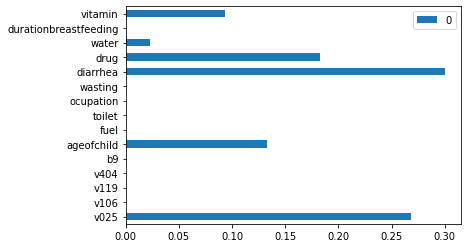

In [ ]:
feature_importances.plot(kind='barh')

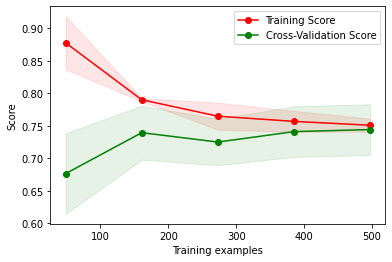

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(dtc_tuned, x_train, y_train, cv=5)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

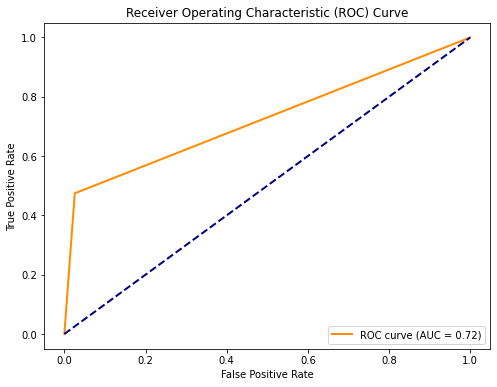

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, y_pred_DT)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Model 2- Random Forest

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['water'])
plt.show()

In [ ]:
#Train RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 50, random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [ ]:
#Make the prediction
y_pred_RF= rfc.predict(x_test)
y_pred_RF

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_RF)*100)

Accuracy:  81.41025641025641


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_RF)

array([[73,  5],
       [24, 54]])

In [ ]:
from sklearn.metrics import precision_score

print("Precision:",precision_score(y_test, y_pred_RF, average='weighted'))

Precision: 0.8339157784378823


In [ ]:
from sklearn.metrics import recall_score
print("REcall:",recall_score(y_test, y_pred_RF, average='weighted'))

REcall: 0.8141025641025641


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF, target_names=['YES', 'NO']))

              precision    recall  f1-score   support

         YES       0.75      0.94      0.83        78
          NO       0.92      0.69      0.79        78

    accuracy                           0.81       156
   macro avg       0.83      0.81      0.81       156
weighted avg       0.83      0.81      0.81       156



In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_RF)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.6923076923076923
Specificity: 0.9358974358974359


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index= X.columns)
feature_importances

In [ ]:
features = list(feature_importances [feature_importances[0]>0].index)
features

<AxesSubplot:>

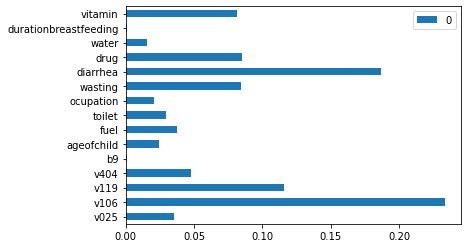

In [ ]:
feature_importances.plot(kind='barh')

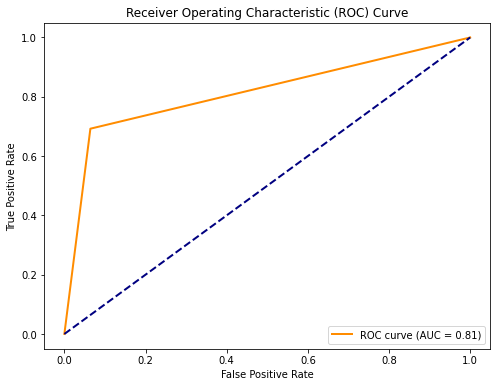

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

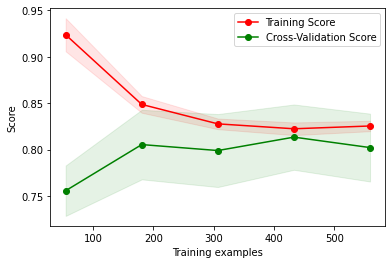

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(rfc, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

MOdel 3- KNN

In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': np.arange(1, 31)}

# Create a K-fold object with 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameter(s):  {'n_neighbors': 1}
Best score:  0.7894580645161289


In [ ]:
# Create a K-Nearest Neighbors model
KNNmodel = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training sets
KNNmodel.fit(x_train, y_train)

# Predict the output for the test data
KNNprediction = KNNmodel.predict(x_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, KNNprediction)

print("Accuracy:", accuracy)

Accuracy: 0.7756410256410257


In [ ]:
print(confusion_matrix(y_test, KNNprediction))
print(classification_report(y_test, KNNprediction))

[[67 11]
 [24 54]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        78
           1       0.83      0.69      0.76        78

    accuracy                           0.78       156
   macro avg       0.78      0.78      0.77       156
weighted avg       0.78      0.78      0.77       156



In [ ]:
cm = confusion_matrix(y_test, KNNprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, KNNprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.6923076923076923
Specificity: 0.8589743589743589


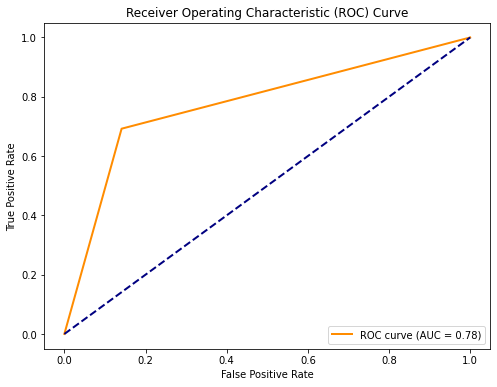

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, KNNprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

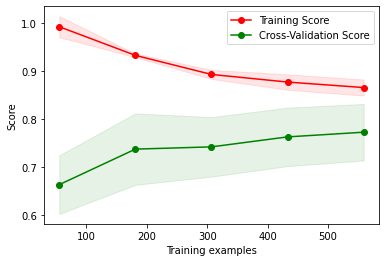

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(KNNmodel, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 4- SVM

In [ ]:
# Create an SVM classifier object
from sklearn.svm import SVC
svm = SVC()

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

# Create a K-fold object with 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best parameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train_nearmiss, y_train_nearmiss)

Best parameter(s):  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best score:  0.8616645161290324


SVC(C=1, gamma=10)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C= 1, gamma= 10, kernel= 'rbf')
svc_model.fit(x_train, y_train)

SVC(C=1, gamma=10)

In [ ]:
svc_pred= svc_model.predict(x_test)

In [ ]:

accuracy = accuracy_score(y_test, svc_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8974358974358975


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[71  7]
 [ 9 69]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        78
           1       0.91      0.88      0.90        78

    accuracy                           0.90       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.90      0.90      0.90       156



In [ ]:
cm = confusion_matrix(y_test, svc_pred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, svc_pred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8846153846153846
Specificity: 0.9102564102564102


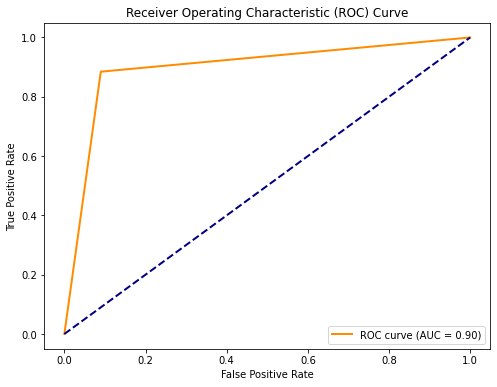

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, svc_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

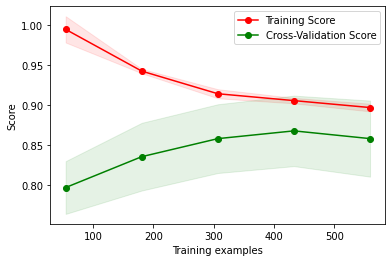

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(svc_model, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 5- Nieve Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
# Define the parameter grid for grid search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best parameters
best_nb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
best_nb.fit(x_train, y_train)

Best parameter(s):  {'var_smoothing': 0.008111308307896872}
Best score:  0.7893032258064515


GaussianNB(var_smoothing=0.008111308307896872)

In [ ]:
# Train the model using the training sets
nb = GaussianNB(var_smoothing= 0.008111308307896872)
nb.fit(x_train, y_train)

# Predict the output for the test data
Nbprediction = nb.predict(x_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, Nbprediction)

print("Accuracy:", accuracy)

TypeError: ignored

In [ ]:
print(confusion_matrix(y_test, Nbprediction))
print(classification_report(y_test, Nbprediction))

[[74  4]
 [38 40]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        78
           1       0.91      0.51      0.66        78

    accuracy                           0.73       156
   macro avg       0.78      0.73      0.72       156
weighted avg       0.78      0.73      0.72       156



In [ ]:
cm = confusion_matrix(y_test, Nbprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, Nbprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.5128205128205128
Specificity: 0.9487179487179487


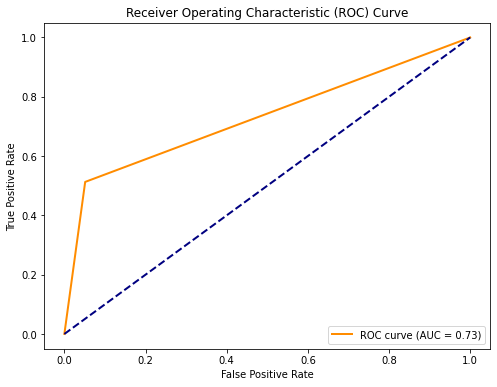

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, Nbprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

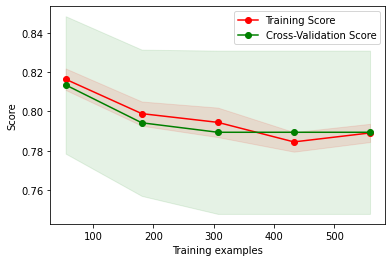

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(nb, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

MOdel 6- Logistic Regression

In [ ]:
#LR MOdel
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best parameters
best_lr = LogisticRegression(**grid_search.best_params_)
best_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameter(s):  {'C': 10, 'penalty': 'l2'}
Best score:  0.8231741935483872


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression(C=10)

In [ ]:
# Create a logistic regression model
LRmodel = LogisticRegression(C=10)

# Train the model using the training sets
LRmodel.fit(x_train, y_train)

# Predict the output for the test data
LRprediction = LRmodel.predict(x_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, LRprediction)

print("Accuracy:", accuracy)

Accuracy: 0.7884615384615384


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(confusion_matrix(y_test, LRprediction))
print(classification_report(y_test, LRprediction))

[[67 11]
 [22 56]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        78
           1       0.84      0.72      0.77        78

    accuracy                           0.79       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.79      0.79      0.79       156



In [ ]:
cm = confusion_matrix(y_test, LRprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LRprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.717948717948718
Specificity: 0.8589743589743589


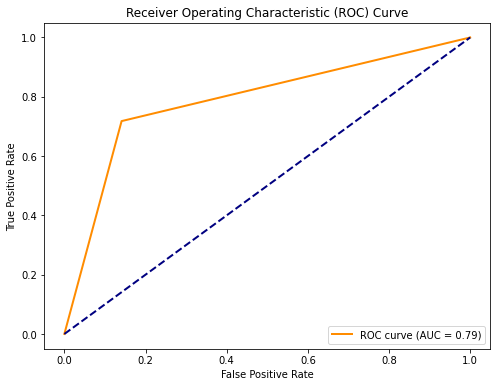

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, LRprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

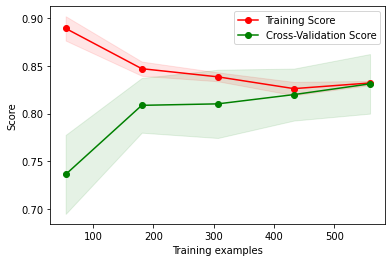

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(LRmodel, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 7-Gradiant boosting

In [ ]:
#Gradiant boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.05, 0.01]}

# Create a K-fold object with 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best parameters
best_gb = GradientBoostingClassifier(**grid_search.best_params_)
best_gb.fit(x_train, y_train)

Best parameter(s):  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.8552774193548387


GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [ ]:
# Train the gradient boosting model
gboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gboost.fit(x_train, y_train)

# Make predictions on the test set
GBpred = gboost.predict(x_test)

# Print the classification report
accuracy = accuracy_score(y_test, GBpred)
print("Accuracy:", accuracy)
print(classification_report(y_test, GBpred))

Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        78
           1       0.93      0.83      0.88        78

    accuracy                           0.88       156
   macro avg       0.89      0.88      0.88       156
weighted avg       0.89      0.88      0.88       156



In [ ]:
cm = confusion_matrix(y_test, GBpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, GBpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8333333333333334
Specificity: 0.9358974358974359


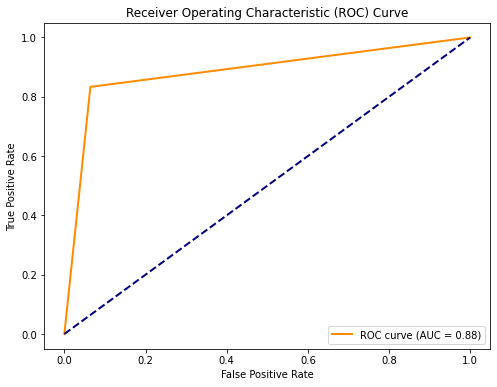

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, GBpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

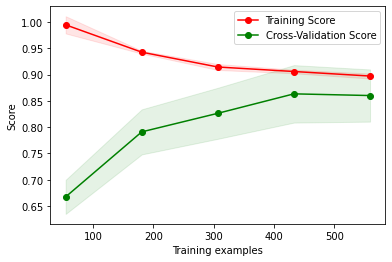

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(gboost, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 8- XGBoost

In [ ]:
# Create a XGBoost Classifier object
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.05, 0.01]}

# Create a K-fold object with 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=kf, scoring='recall')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fit the model with the best parameters
best_xgb = XGBClassifier(**grid_search.best_params_)
best_xgb.fit(x_train, y_train)

Best parameter(s):  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.7660235842588784


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_model=XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGpred= xgb_model.predict(x_test)
print(XGpred)

[1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0]


In [ ]:
accuracy_score(y_test, XGpred)

0.8525641025641025

In [ ]:

print(confusion_matrix(y_test, XGpred))
print(classification_report(y_test, XGpred))

[[71  7]
 [16 62]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        78
           1       0.90      0.79      0.84        78

    accuracy                           0.85       156
   macro avg       0.86      0.85      0.85       156
weighted avg       0.86      0.85      0.85       156



In [ ]:
cm = confusion_matrix(y_test, XGpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, XGpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7948717948717948
Specificity: 0.9102564102564102


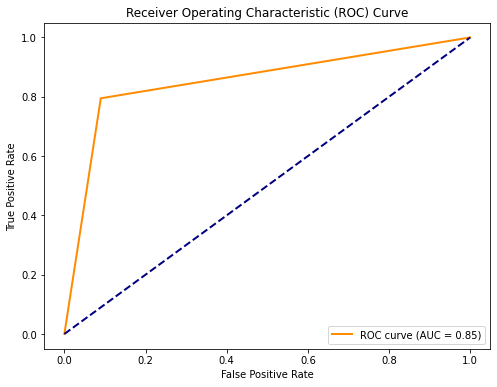

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, XGpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

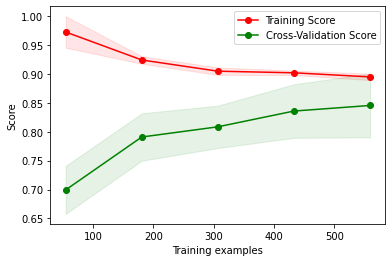

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(xgb_model, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 9- LASSO Logistic regression

In [ ]:
#Lasso Logistic RM
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)

In [ ]:
# Define the parameter grid for grid search
param_grid = {'eps': [0.01, 0.001, 0.0001],
              'n_alphas': [50, 100, 200]}

# Create a K-fold object with 5 folds
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", -1 * grid_search.best_score_)

# Fit the model with the best parameters
best_lasso = LassoCV(cv=5, eps=grid_search.best_params_['eps'], n_alphas=grid_search.best_params_['n_alphas'])
best_lasso.fit(x_train, y_train)

Best parameter(s):  {'eps': 0.01, 'n_alphas': 50}
Best score:  0.1580614567564475


LassoCV(cv=5, eps=0.01, n_alphas=50)

In [ ]:
# Train the lasso logistic regression model
lasso_logistic_reg = LogisticRegressionCV(penalty='l1', solver='saga', cv=10)
lasso_logistic_reg.fit(x_train, y_train)

# Make predictions on the test set
LAsopred = lasso_logistic_reg.predict(x_test)

# Print the classification report
accuracy = accuracy_score(y_test, LAsopred)
print("Accuracy:", accuracy)
print(classification_report(y_test, LAsopred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Accuracy: 0.7884615384615384
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        78
           1       0.84      0.72      0.77        78

    accuracy                           0.79       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.79      0.79      0.79       156



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_test, LAsopred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LAsopred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.717948717948718
Specificity: 0.8589743589743589


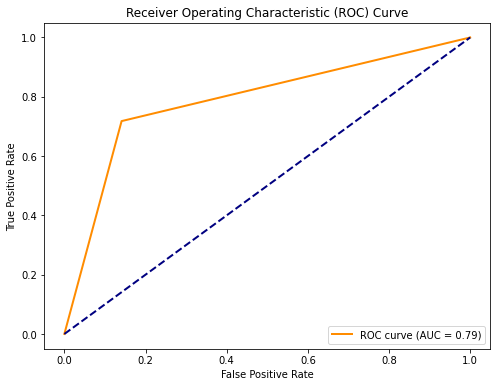

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, LAsopred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sa

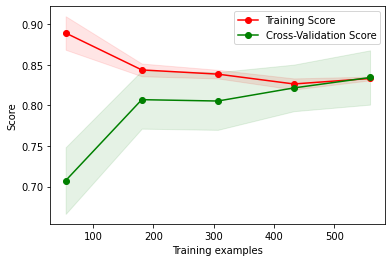

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(lasso_logistic_reg, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

2 class neural network

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, KFold

# Convert the target variable into binary classes
y = (y_train > np.median(y_train)).astype(int)

# Create a function to build the neural network model
def create_model(optimizer='adam', activation='relu', hidden_layer_sizes=(32,)):
    model = Sequential()
    for i, layer_size in enumerate(hidden_layer_sizes):
        if i == 0:
            model.add(Dense(layer_size, input_dim=X.shape[1], activation=activation))
        else:
            model.add(Dense(layer_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the parameter grid for grid search
param_grid = {'optimizer': ['adam', 'rmsprop', 'sgd'],
              'activation': ['relu', 'sigmoid'],
              'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)]}



In [ ]:
# Create a neural network model object with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Perform grid search with K-fold cross validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameter(s) and score
print("Best parameter(s): ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



<ipython-input-205-aa37923dbb7f>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


4/4 [==============================] - 0s 3ms/step
Best parameter(s):  {'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'optimizer': 'adam'}
Best score:  0.8311999999999999


In [ ]:
# Fit the model with the best parameters
best_model = create_model(**grid_search.best_params_)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
best_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping], validation_split=0.2)

# Evaluate the model on the test data
y_pred = best_model.predict(x_train)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
fpr, tpr, thresholds = roc_curve(y, y_pred)
auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1 score: ", f1)
print("AUC: ", auc_score)

20/20 [==============================] - 0s 1ms/step
Accuracy:  0.8440514469453376
Recall:  0.7717041800643086
F1 score:  0.8318890814558059
AUC:  0.8440514469453375


#Ensemble Learning

In [ ]:
# Import required libraries
from sklearn.ensemble import VotingClassifier


# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('svm', svc_model), ('gb', gboost), ('xgb', xgb_model)], voting='soft')

# Fit the ensemble model to the data
ensemble_model.fit(x_train, y_train)

# Predict the target variable
y_pred_ensemble = ensemble_model.predict(x_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred_ensemble)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.75%


In [ ]:
print(confusion_matrix(y_train, y_pred_ensemble))
print(classification_report(y_train, y_pred_ensemble))

[[292  19]
 [ 51 260]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       311
           1       0.93      0.84      0.88       311

    accuracy                           0.89       622
   macro avg       0.89      0.89      0.89       622
weighted avg       0.89      0.89      0.89       622



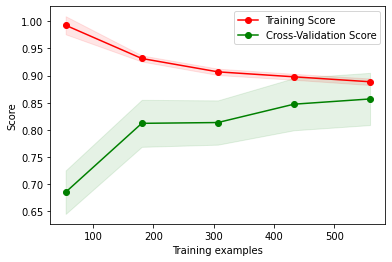

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, x_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Train XGBoost classifiers on each resampled training data
from xgboost import XGBClassifier
clf_oversampled = XGBClassifier()
clf_oversampled.fit(X_oversampled, y_oversampled)

XGBClassifier()

In [ ]:
# Make predictions on testing data for each classifier
y_pred_oversampled_rand = clf_oversampled.predict_proba(X_test)[:, 1]

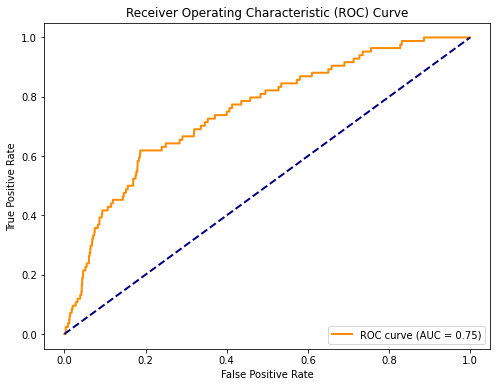

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, y_pred_oversampled_rand)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Try SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Train XGBoost classifiers on smote
clf_smote = XGBClassifier()
clf_smote.fit(X_smote, y_smote)

XGBClassifier()

In [ ]:
# Make predictions on testing data for smote
y_pred_oversampled_smote = clf_smote.predict_proba(X_test)[:, 1]

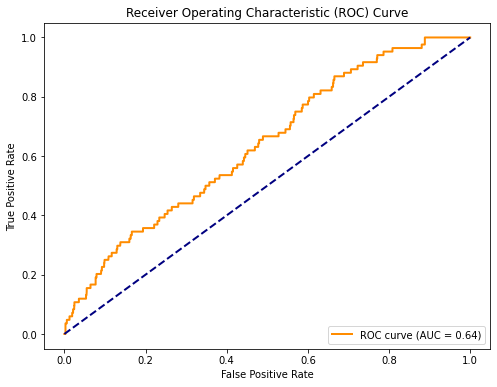

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_sm = roc_curve(y_test, y_pred_oversampled_smote)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#now try nearmiss
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss(version=3)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train, y_train)

In [ ]:
# Train XGBoost classifiers on smote
clf_nearmiss = XGBClassifier()
clf_nearmiss.fit(X_nearmiss, y_nearmiss)

XGBClassifier()

In [ ]:
# Make predictions on testing data for smote
y_pred_nearmiss = clf_nearmiss.predict_proba(X_test)[:, 1]

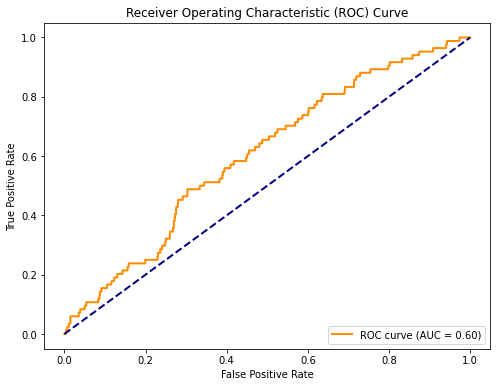

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_nm = roc_curve(y_test, y_pred_nearmiss)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#so we have seen that random oversampler is better performing. 
# the next is to go ahead and train our models

Model 1- Decision Tree 

In [ ]:
X= X_oversampled
Y= y_oversampled

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=100)

In [ ]:
#Model-1 Decision Tree classifier
#Training with Entropy
dtc = DecisionTreeClassifier(criterion="entropy", random_state= 42, max_depth=5, min_samples_leaf=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [ ]:
#Make the prediction
y_pred_DT= dtc.predict(X_test)
y_pred_DT

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_DT)*100)

Accuracy:  63.88214904679376


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_DT)

array([[1263,  143],
       [ 899,  580]])

In [ ]:
from sklearn.metrics import precision_score

print("Precision:",precision_score(y_test, y_pred_DT, average='weighted'))

Precision: 0.6959556173189471


In [ ]:
from sklearn.metrics import recall_score
print("REcall:",recall_score(y_test, y_pred_DT, average='weighted'))

REcall: 0.6388214904679376


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT, target_names=['YES', 'NO']))

              precision    recall  f1-score   support

         YES       0.58      0.90      0.71      1406
          NO       0.80      0.39      0.53      1479

    accuracy                           0.64      2885
   macro avg       0.69      0.65      0.62      2885
weighted avg       0.70      0.64      0.62      2885



In [ ]:
cm = confusion_matrix(y_test, y_pred_DT)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_DT)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.24982888432580425
Specificity: 0.7485955056179775


In [ ]:
dtc.get_params()

In [ ]:
feature_importances = pd.DataFrame(dtc.feature_importances_, index= X.columns)
feature_importances

In [ ]:
features = list(feature_importances [feature_importances[0]>0].index)
features

In [ ]:
feature_importances.plot(kind='barh')

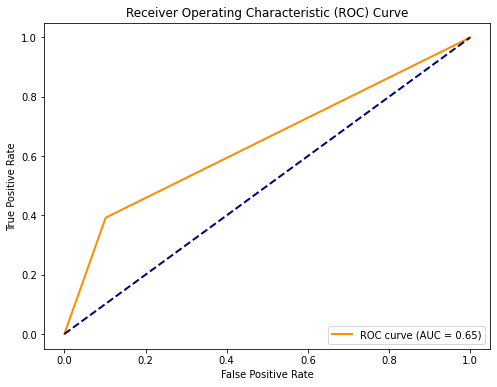

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, y_pred_DT)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

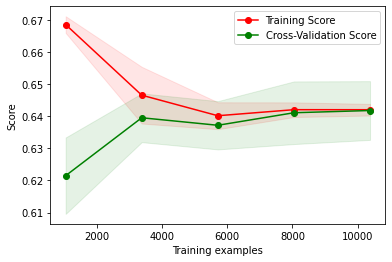

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(dtc, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 2- Random Forest

In [ ]:
#Train RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Make the prediction
y_pred_RF= rfc.predict(X_test)
y_pred_RF

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_RF)*100)

Accuracy:  98.64818024263433


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_RF)

array([[1367,   39],
       [   0, 1479]])

In [ ]:
from sklearn.metrics import precision_score

print("Precision:",precision_score(y_test, y_pred_RF, average='weighted'))

Precision: 0.9868291078976031


In [ ]:
from sklearn.metrics import recall_score
print("REcall:",recall_score(y_test, y_pred_RF, average='weighted'))

REcall: 0.9864818024263432


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF, target_names=['YES', 'NO']))

              precision    recall  f1-score   support

         YES       1.00      0.97      0.99      1406
          NO       0.97      1.00      0.99      1479

    accuracy                           0.99      2885
   macro avg       0.99      0.99      0.99      2885
weighted avg       0.99      0.99      0.99      2885



In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_RF)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.5222450376454483
Specificity: 0.46980337078651685


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index= X.columns)
feature_importances

In [ ]:
features = list(feature_importances [feature_importances[0]>0].index)
features

In [ ]:
feature_importances.plot(kind='barh')

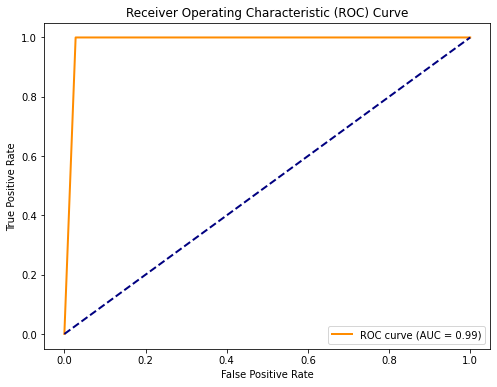

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

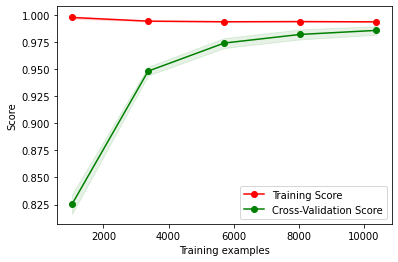

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train,y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 3- KNN

In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create a K-Nearest Neighbors model
KNNmodel = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
KNNmodel.fit(X_train, y_train)

# Predict the output for the test data
KNNprediction = KNNmodel.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, KNNprediction)

print("Accuracy:", accuracy)

Accuracy: 0.8932409012131716


In [ ]:
print(confusion_matrix(y_test, KNNprediction))
print(classification_report(y_test, KNNprediction))

[[1098  308]
 [   0 1479]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1406
           1       0.83      1.00      0.91      1479

    accuracy                           0.89      2885
   macro avg       0.91      0.89      0.89      2885
weighted avg       0.91      0.89      0.89      2885



In [ ]:
cm = confusion_matrix(y_test, KNNprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, KNNprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.6043805612594113
Specificity: 0.3651685393258427


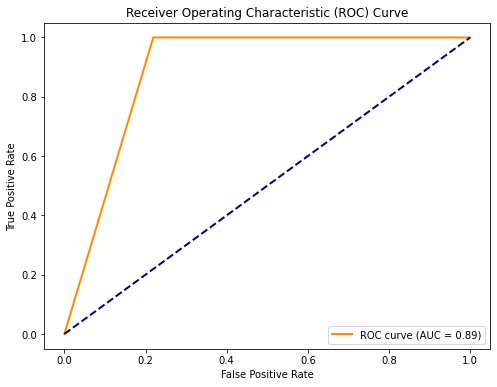

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, KNNprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

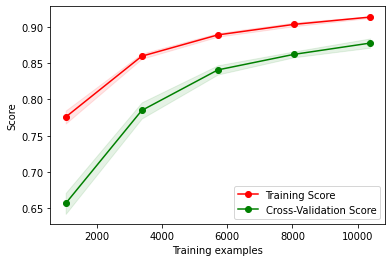

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(KNNmodel, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 4- SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
svc_pred= svc_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, svc_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7064124783362218


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[1194  212]
 [ 635  844]]
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1406
           1       0.80      0.57      0.67      1479

    accuracy                           0.71      2885
   macro avg       0.73      0.71      0.70      2885
weighted avg       0.73      0.71      0.70      2885



In [ ]:
cm = confusion_matrix(y_test, svc_pred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, svc_pred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.3682409308692676
Specificity: 0.6362359550561798


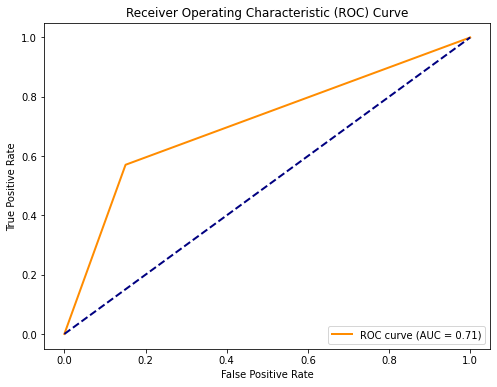

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, svc_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

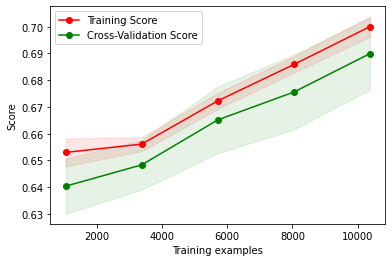

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(svc_model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 5- Nieve Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create a Gaussian Naive Bayes model
NBmodel = GaussianNB()

# Train the model using the training sets
NBmodel.fit(X_train, y_train)

# Predict the output for the test data
Nbprediction = NBmodel.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, Nbprediction)

print("Accuracy:", accuracy)

Accuracy: 0.6377816291161178


In [ ]:
print(confusion_matrix(y_test, Nbprediction))
print(classification_report(y_test, Nbprediction))

[[960 446]
 [599 880]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1406
           1       0.66      0.59      0.63      1479

    accuracy                           0.64      2885
   macro avg       0.64      0.64      0.64      2885
weighted avg       0.64      0.64      0.64      2885



In [ ]:
cm = confusion_matrix(y_test, Nbprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, Nbprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.4531143052703628
Specificity: 0.5337078651685393


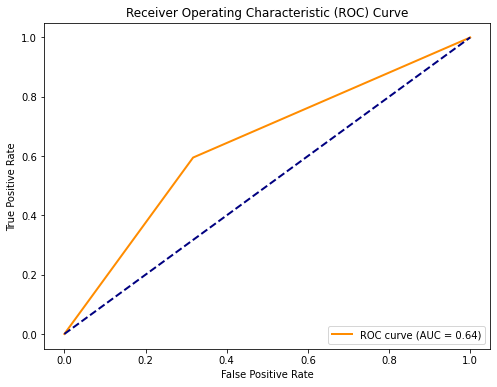

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, Nbprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

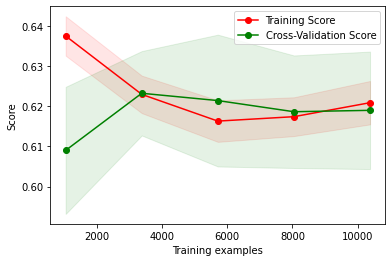

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(NBmodel, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

MOdel 6- Logistic Regression

In [ ]:
#LR MOdel
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a logistic regression model
LRmodel = LogisticRegression()

# Train the model using the training sets
LRmodel.fit(X_train, y_train)

# Predict the output for the test data
LRprediction = LRmodel.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, LRprediction)

print("Accuracy:", accuracy)

Accuracy: 0.6457538994800693


In [ ]:
print(confusion_matrix(y_test, LRprediction))
print(classification_report(y_test, LRprediction))

[[1200  206]
 [ 816  663]]
              precision    recall  f1-score   support

           0       0.60      0.85      0.70      1406
           1       0.76      0.45      0.56      1479

    accuracy                           0.65      2885
   macro avg       0.68      0.65      0.63      2885
weighted avg       0.68      0.65      0.63      2885



In [ ]:
cm = confusion_matrix(y_test, LRprediction)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LRprediction)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.3025325119780972
Specificity: 0.7001404494382022


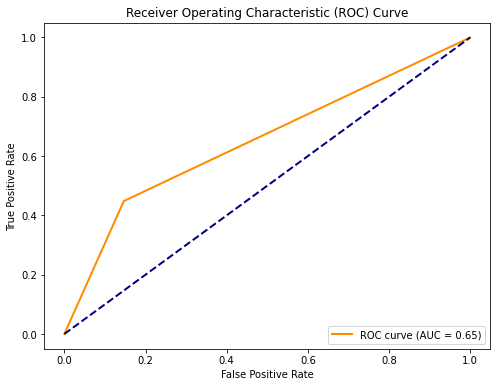

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, LRprediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

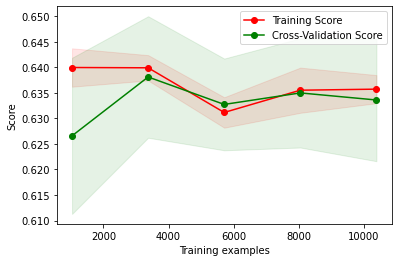

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(LRmodel, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 7-Gradiant boosting

In [ ]:
#Gradiant boosting
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Train the gradient boosting model
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gboost.fit(X_train, y_train)

# Make predictions on the test set
GBpred = gboost.predict(X_test)

# Print the classification report
accuracy = accuracy_score(y_test, GBpred)
print("Accuracy:", accuracy)
print(classification_report(y_test, GBpred))

Accuracy: 0.7133448873483536
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1406
           1       0.78      0.61      0.69      1479

    accuracy                           0.71      2885
   macro avg       0.72      0.72      0.71      2885
weighted avg       0.73      0.71      0.71      2885



In [ ]:
cm = confusion_matrix(y_test, GBpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, GBpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.4086242299794661
Specificity: 0.6004213483146067


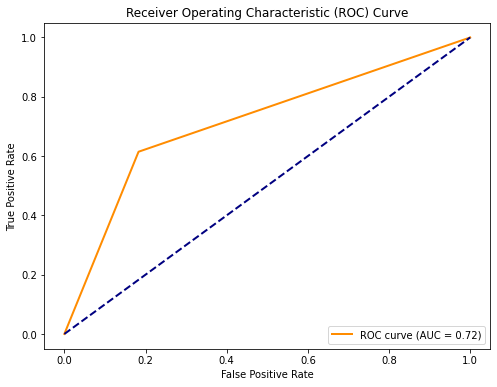

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, GBpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

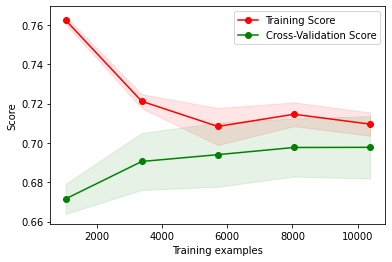

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(gboost, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 8- XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
XGpred= xgb_model.predict(X_test)
print(XGpred)

[1 0 0 ... 1 0 0]


In [ ]:
accuracy_score(y_test, XGpred)

0.6974003466204506

In [ ]:

print(confusion_matrix(y_test, XGpred))
print(classification_report(y_test, XGpred))

[[1139  267]
 [ 606  873]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1406
           1       0.77      0.59      0.67      1479

    accuracy                           0.70      2885
   macro avg       0.71      0.70      0.69      2885
weighted avg       0.71      0.70      0.69      2885



In [ ]:
cm = confusion_matrix(y_test, XGpred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, XGpred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.3928815879534565
Specificity: 0.6025280898876404


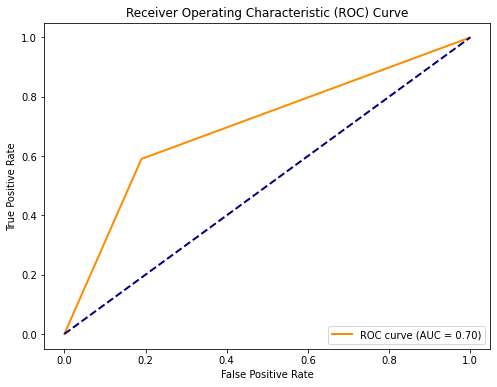

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, XGpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

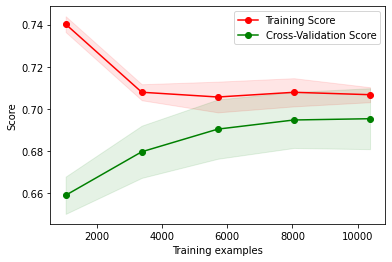

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 9- LASSO Logistic regression

In [ ]:
#Lasso Logistic RM
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Train the lasso logistic regression model
lasso_logistic_reg = LogisticRegressionCV(penalty='l1', solver='saga', cv=10)
lasso_logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
LAsopred = lasso_logistic_reg.predict(X_test)

# Print the classification report
accuracy = accuracy_score(y_test, LAsopred)
print("Accuracy:", accuracy)
print(classification_report(y_test, LAsopred))

Accuracy: 0.6474870017331023
              precision    recall  f1-score   support

           0       0.60      0.86      0.70      1406
           1       0.77      0.45      0.56      1479

    accuracy                           0.65      2885
   macro avg       0.68      0.65      0.63      2885
weighted avg       0.69      0.65      0.63      2885



In [ ]:
cm = confusion_matrix(y_test, LAsopred)
# calculate sensitivity/recall
sensitivity = recall_score(y_test, LAsopred)

# calculate specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.29705681040383297
Specificity: 0.7036516853932584


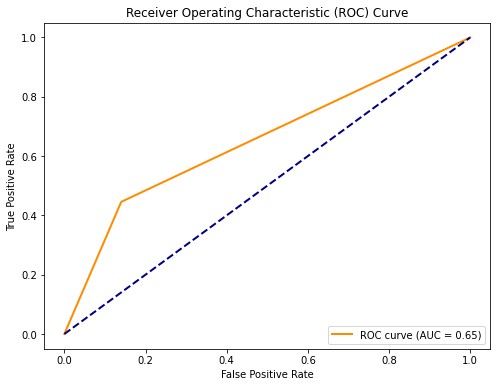

In [ ]:
# Compute ROC curves and AUCs for each resampling method
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds_rand = roc_curve(y_test, LAsopred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

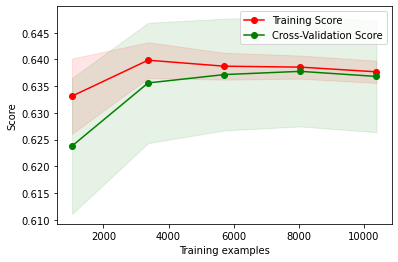

In [ ]:
# Use learning_curve to generate the training and test accuracy scores
train_sizes, train_scores, test_scores = learning_curve(lasso_logistic_reg, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Model 10- 2class Neural network

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Convert the target labels to binary
y = np.where(Y == 0, 0, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Define the neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=19))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
24/24 [==============================] - 1s 9ms/step - loss: 0.7507 - accuracy: 0.5089 - val_loss: 0.7227 - val_accuracy: 0.4898
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5531 - val_loss: 0.7186 - val_accuracy: 0.4943
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5729 - val_loss: 0.7165 - val_accuracy: 0.4936
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5916 - val_loss: 0.7165 - val_accuracy: 0.4981
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5980 - val_loss: 0.7158 - val_accuracy: 0.4932
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6096 - val_loss: 0.7151 - val_accuracy: 0.4929
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6134 - val_loss: 0.7185 - val_accuracy: 0.4991
Epoch 8/50
24/24 [==

#Ensemble Learning

In [ ]:
# Import required libraries
from sklearn.ensemble import VotingClassifier

# Create SVM model
svm = svc_model

# Create Gradient Boosting model
gb = gboost

# Create XGBoost model
xgb = xgb_model

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('svm', svm), ('gb', gb), ('xgb', xgb)], voting='soft')

# Fit the ensemble model to the data
ensemble_model.fit(x_train, y_train)

# Predict the target variable
y_pred_Ensemble = ensemble_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_Ensemble)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

AttributeError: ignored